In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [4]:
df_unemployment = pd.read_csv("./Data/uk_unemployment_rate_monthly.csv")

In [5]:
df_unemployment.head()


,t,Period,Unemployment
0,1,1971 FEB,3.8
1,2,1971 MAR,3.9
2,3,1971 APR,4.0
3,4,1971 MAY,4.1
4,5,1971 JUN,4.1


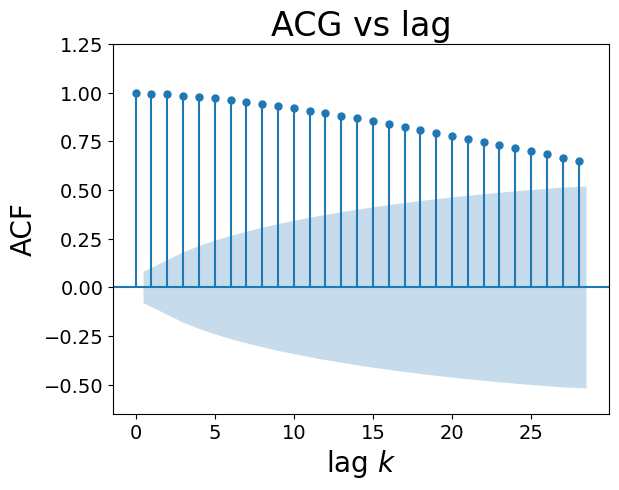

In [ ]:
plot_acf(df_unemployment['Unemployment'], auto_ylims=True)
plt.title('ACF vs lag', fontsize=24)
plt.xlabel(r'lag $k$', fontsize=20)
plt.ylabel('ACF', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

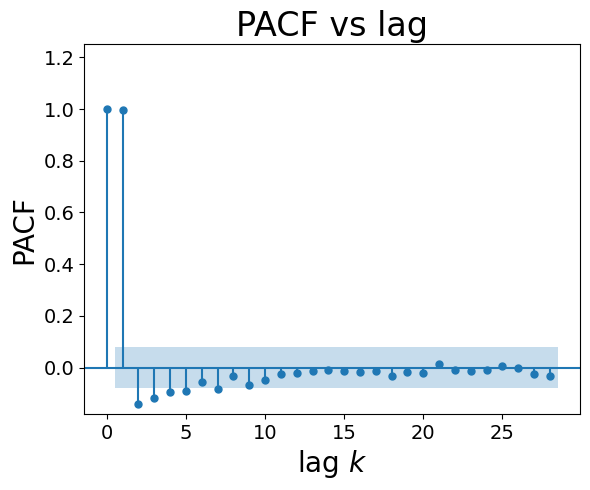

In [7]:
plot_pacf(df_unemployment['Unemployment'], method='ywm' ,auto_ylims=True)
plt.title('PACF vs lag', fontsize=24)
plt.xlabel(r'lag $k$', fontsize=20)
plt.ylabel('PACF', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [8]:
df_sunactivity = pd.read_csv('./Data/sunactivity_deseasonalized.csv')


In [9]:
y = df_sunactivity['sunactivity_deseasonalized']

n_steps = 6

n_train = y.shape[0] - n_steps
y_train = y[0:n_train]

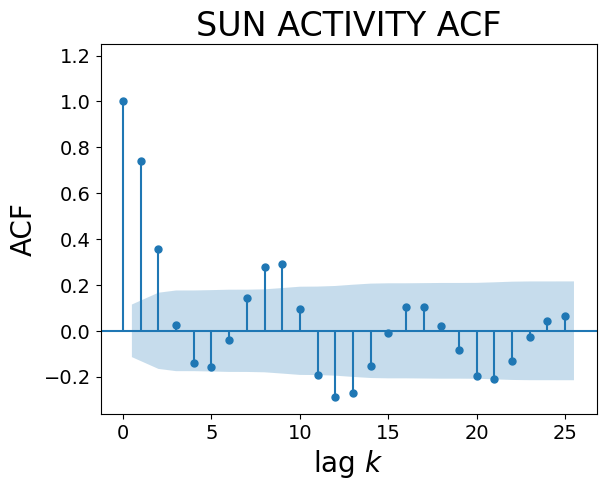

In [10]:
plot_acf(y_train, auto_ylims=True)
plt.title('SUN ACTIVITY ACF', fontsize=24)
plt.xlabel(r'lag $k$', fontsize=20)
plt.ylabel('ACF', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

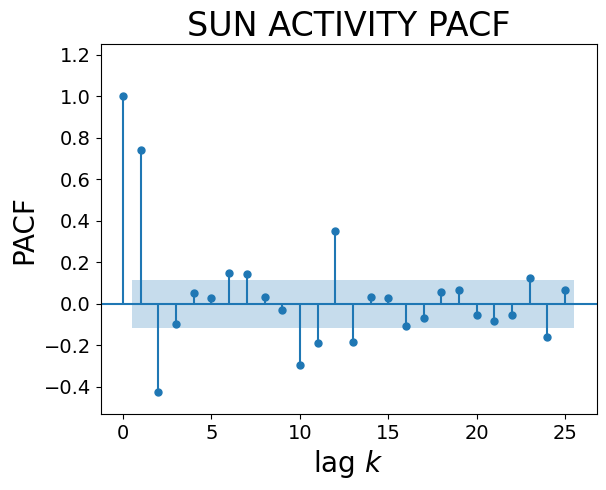

In [11]:
plot_pacf(y_train, method='ldb', auto_ylims=True)
plt.title('SUN ACTIVITY PACF', fontsize=24)
plt.xlabel(r'lag $k$', fontsize=20)
plt.ylabel('PACF', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [12]:
auto_arima(y_train)

/home/oliveiraphm/fifteen_mc/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/oliveiraphm/fifteen_mc/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/oliveiraphm/fifteen_mc/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/oliveiraphm/fifteen_mc/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/oliveiraphm/fifteen_mc/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_

ARIMA(order=(3, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [13]:
y_arima = ARIMA(y_train, order=(3,0,0))
y_fitted = y_arima.fit()

In [14]:
print(y_fitted.summary())

                                   SARIMAX Results                                    
Dep. Variable:     sunactivity_deseasonalized   No. Observations:                  292
Model:                         ARIMA(3, 0, 0)   Log Likelihood               -1288.099
Date:                        Sun, 16 Mar 2025   AIC                           2586.198
Time:                                16:27:48   BIC                           2604.582
Sample:                                     0   HQIC                          2593.562
                                        - 292                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2545      2.990      0.085      0.932      -5.606       6.115
ar.L1          1.0201      0.047     21.718      0.000       0.928 

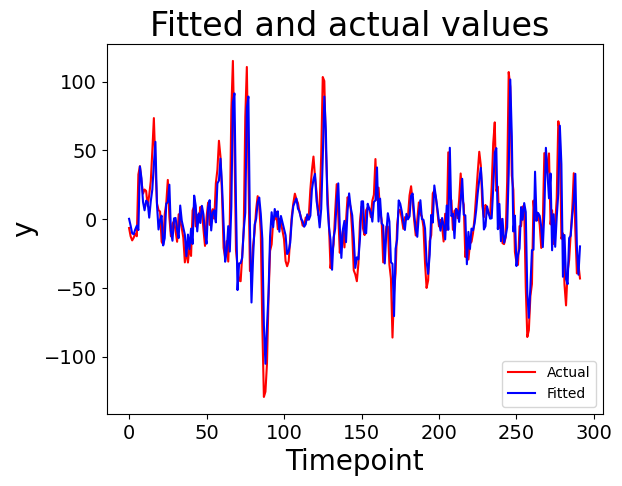

In [15]:
plt.plot(y_train, 'red', label='Actual')
plt.plot(y_fitted.predict(),'blue', label='Fitted')
plt.title('Fitted and actual values ', fontsize=24)
plt.xlabel('Timepoint', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right')
plt.show()

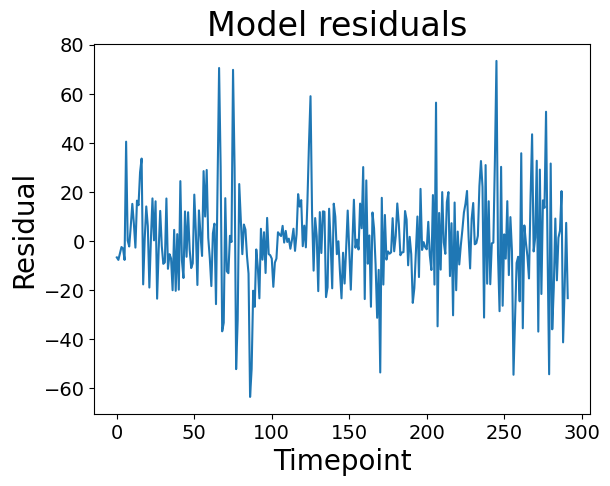

In [16]:
plt.plot(y_fitted.resid)
plt.title('Model residuals ', fontsize=24)
plt.xlabel('Timepoint', fontsize=20)
plt.ylabel('Residual', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

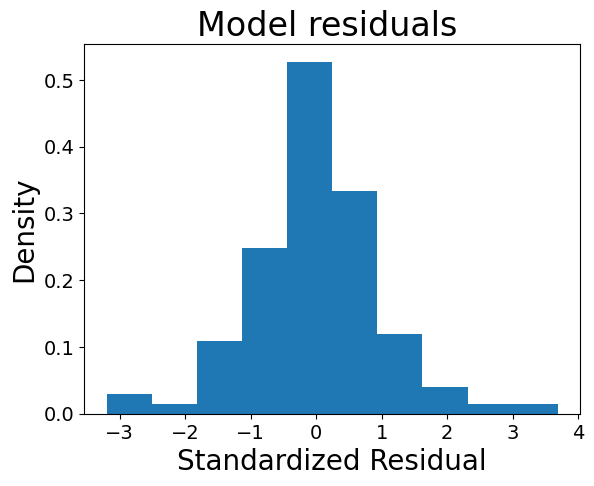

In [17]:
plt.hist(y_fitted.resid/np.std(y_fitted.resid), density=True)
plt.title('Model residuals ', fontsize=24)
plt.xlabel('Standardized Residual', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

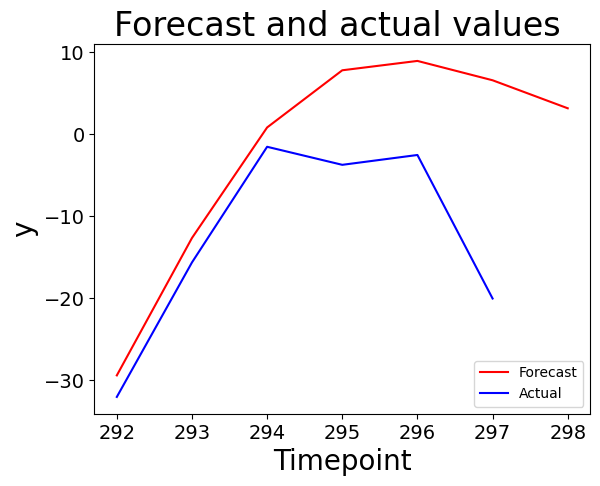

In [18]:
plt.plot(y_fitted.predict(start=n_train, end=n_train+n_steps, dynamic=True), 'red', label='Forecast')
plt.plot(y[n_train:(n_train+n_steps)], 'blue', label='Actual')
plt.title('Forecast and actual values ', fontsize=24)
plt.xlabel('Timepoint', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right')
plt.show()